 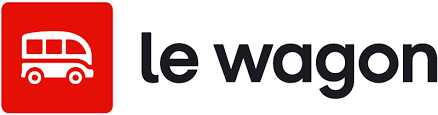

# Instagram likes prediction

In this challenge, we'll be taking Linear Regression further by seeing if we can predict some metrics from social media!

Let's get started!

## Data Exploration

a) Download the [dataset](https://drive.google.com/file/d/1O8ey3uytjqzRUQXTnmXkiqGBoa6lne1C/view?usp=sharing) and upload it to Google Colab. Execute the cell below to load data in a `posts` dataframe. One row of this dataset represents an Instagram post.

In [ ]:
# if collab is used
!gdown '1O8ey3uytjqzRUQXTnmXkiqGBoa6lne1C'

zsh:1: command not found: gdown


In [ ]:
import numpy as np
import pandas as pd

df_posts = pd.read_csv('/content/posts.csv.bz', compression='bz2')
df_posts

,id,followers,comments,posts,likes,ts
0,6e56f910,1804,2,851,73,2017-10-08 16:21:28
1,0bea9208,542,1,846,7,2017-07-07 11:58:18
2,88ec6c3f,669,2,1495,33,2018-03-19 17:22:29
3,006b0d03,757,9,144,166,2018-09-02 18:49:52
4,c8a0f2a6,539,4,453,71,2018-04-18 14:15:36
...,...,...,...,...,...,...
2260897,f58b19ab,1847,14,678,166,2018-09-10 15:02:43
2260898,58433abf,237,1,192,31,2018-10-13 10:02:59
2260899,10c4b02c,267,2,110,35,2018-09-18 22:42:03
2260900,0f7064e1,214,3,53,50,2018-11-01 11:32:57


b) Column `id` designates the author. How many **unique** authors do we have ?

In [ ]:
df_posts['id'].nunique()

9298

c) Sort `df_posts` by **ascending date**.

In [ ]:
df_posts = df_posts.sort_values(by='ts', ascending=True)
df_posts

,id,followers,comments,posts,likes,ts
651352,8fd5eb8f,560,1,1270,8,2015-01-01 00:00:03
1066195,e118b32e,711,0,646,23,2015-01-01 00:00:37
1275101,c2c2c06e,1703,0,811,18,2015-01-01 00:03:10
404586,d15ab509,357,1,794,10,2015-01-01 00:04:01
1180122,9473b9d1,207,0,217,2,2015-01-01 00:04:18
...,...,...,...,...,...,...
1747502,bd90c5ec,840,1,120,107,2019-03-10 23:53:48
673328,2e246173,582,2,12,27,2019-03-10 23:53:54
1860496,b0817588,1751,0,704,23,2019-03-10 23:54:41
1883069,4bdf6fc3,1250,2,303,42,2019-03-10 23:57:42


d) This dataset contains several posts for the same author.

By using the pandas function `drop_duplicates()` with parameter `keep=last`, **keep only the last post** made by each author.

This should leave you with a dataframe with as many rows as unique authors!

In [ ]:
df_posts = df_posts.drop_duplicates('id', keep='last')
df_posts

,id,followers,comments,posts,likes,ts
1955601,c43f3233,1532,2,76,177,2016-03-26 20:15:50
145849,38cc9619,1395,10,152,192,2016-04-01 14:53:58
66276,58ce1b8d,582,1,80,32,2016-06-23 12:28:21
1922869,0dd11d6c,1566,0,57,150,2016-07-24 19:29:49
563184,688eb92e,1675,1,159,166,2016-08-24 21:15:57
...,...,...,...,...,...,...
1747502,bd90c5ec,840,1,120,107,2019-03-10 23:53:48
673328,2e246173,582,2,12,27,2019-03-10 23:53:54
1860496,b0817588,1751,0,704,23,2019-03-10 23:54:41
1883069,4bdf6fc3,1250,2,303,42,2019-03-10 23:57:42


e) Use Plotly to draw a scatter plot between likes and followers. Do you see any **correlation**?


In [ ]:
import plotly.express as px

fig = px.scatter(df_posts, "followers", "likes")
fig.show()

This visual correlation that we see will serve as the intuition for the modelling that we are about to do!

## Modeling

### Preprocessing

a) Isolate the target and the feature!

For our first model, we'll start with the feature being the number of followers. The target, as you already know, is the number of likes!

**Assign X and y appropriately!**

In [ ]:
X = df_posts[["followers"]]
y = df_posts["likes"]

b) Remember what we said about the importance of separating data into train and test splits?

Split X and y, **80% for training and 20% for testing** into appropriately named variables - X_train, X_test, y_train and y_test.

Don't make your life difficult, use the `train_test_split` function!

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

c) Now we need to normalize! I know you're excited to apply your new modelling skills, but we first need to make sure the data is scaled!

Scale X_train and X_test - remember to only fit the scaler on X_train and to transform X_train and X_test!

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression

d) Train a Linear Regression model that predicts likes (our y) based on followers (our X)! Remember to only train it on our **scaled training set**, not on our test set!

In [ ]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression().fit(X_train_scaled, y_train)

### Evaluation

e) What is the R2 score on the train data? What is the MSE (mean squared error)? What about the MAE (mean absolute error)?

Do you think our model is performing well?

<details>
<summary><i>Hint</i></summary>
    ⟿  Use `mean_squared_error` and `mean_absolute_error` of module `sklearn.metrics`.
</details>

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

r2 = model_1.score(X_train_scaled, y_train)
train_pred_model_1 = model_1.predict(X_train_scaled)

mse = mean_squared_error(y_true=y_train, y_pred=train_pred_model_1)
mae = mean_absolute_error(y_true=y_train, y_pred=train_pred_model_1)

print(f"{r2=}")
print(f"{mse=}")
print(f"{mae=}")

r2=0.24383590575878122
mse=1743.3816146059862
mae=32.48144664990069


R2 is close to 0, so the model doesn't look very good.
MSE is quite difficult to interpret, but MAE is much simpler. Our model has an error of 32 likes on average.

f) It's time to evaluate our model on test data!

Use your model to predict likes for test data and store the predictions in 'pred_model_1'.

In [ ]:
pred_model_1 = model_1.predict(X_test_scaled)

g) What is R2 score value on test data? What is the MSE (mean squared error)?

Do you think our model is a good one?

In [ ]:
r2 = model_1.score(X_test_scaled, y_test)
mse = mean_squared_error(y_true=y_test, y_pred=pred_model_1)
mae = mean_absolute_error(y_true=y_test, y_pred=pred_model_1)

print(f"{r2=}")
print(f"{mse=}")
print(f"{mae=}")

r2=0.26592967746047014
mse=5746.982075704714
mae=72.17196745972703


Results are similar, our model is not really good. It was expected because with such simple model, you cannot get very accurate results.

h) We will try to add one feature to our model.

What does this code do?

In [ ]:
# load data
archive = pd.read_csv('posts.csv.bz', compression='bz2')

# sort values by date
archive = archive.sort_values(by='ts', ascending=True)

# keep only most recent posts
most_recent_posts = archive.drop_duplicates('id', keep='last')

# keep from archive every posts except most recent
posts_wo_most_recent = archive[~archive.index.isin(most_recent_posts.index)]

# compute median of likes on previous posts
median_last_posts = posts_wo_most_recent.groupby('id', as_index=False)[['likes']].median()

# rename column likes by historical_likes
median_last_posts = median_last_posts.rename({'likes': 'historical_likes'}, axis=1)

# merge this colum to initial dataframe
df_posts_new = most_recent_posts.merge(median_last_posts, on="id")

i) Have a look at `df_posts_new` to understand what the previous code did!

In [ ]:
df_posts_new

,id,followers,comments,posts,likes,ts,historical_likes
0,c43f3233,1532,2,76,177,2016-03-26 20:15:50,146.0
1,38cc9619,1395,10,152,192,2016-04-01 14:53:58,187.0
2,58ce1b8d,582,1,80,32,2016-06-23 12:28:21,17.5
3,0dd11d6c,1566,0,57,150,2016-07-24 19:29:49,168.0
4,688eb92e,1675,1,159,166,2016-08-24 21:15:57,149.0
...,...,...,...,...,...,...,...
9242,bd90c5ec,840,1,120,107,2019-03-10 23:53:48,52.0
9243,2e246173,582,2,12,27,2019-03-10 23:53:54,108.5
9244,b0817588,1751,0,704,23,2019-03-10 23:54:41,26.0
9245,4bdf6fc3,1250,2,303,42,2019-03-10 23:57:42,44.0


j) Let's start all over, but now X is **followers and historical likes**.

Split X and y!

In [ ]:
X = df_posts_new[["historical_likes", "followers"]]
y = df_posts_new["likes"]

k) Split into train and test split!

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

l) Scale!

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

m) Time to train a new model!

Train a new linear regression with our new `X_train_scaled`!

In [ ]:
model_2 = LinearRegression()
model_2.fit(X_train_scaled, y_train)

LinearRegression()

i) Calculate R2, MSE and MAE on the test data. What do you think of this new model?

In [ ]:
test_pred_model_2 = model_2.predict(X_test_scaled)
r2 = model_2.score(X_test_scaled, y_test)
mse = mean_squared_error(y_true=y_test, y_pred=test_pred_model_2)
mae = mean_absolute_error(y_true=y_test, y_pred=test_pred_model_2)

print(f"{r2=}")
print(f"{mse=}")
print(f"{mae=}")

r2=0.5690887435647898
mse=1002.354477729497
mae=23.469662886099343


This model is better, with an average error of around 23 likes.
R2 is much better than the previous model.